
# Advanced Recommender Systems with Python

* For this exercise, I've taken help from Kaggle. Because these are some advanced `Linear Algebra` concepts.


## Methods Used

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**.

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items.

* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

## Collaborative Filtering

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use.

CF can be divided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**.

In this notebook, we will implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity.

## The Data

We will use famous MovieLens dataset, which is one of the most common datasets used when implementing and testing recommender engines. It contains 100k movie ratings from 943 users and a selection of 1682 movies.

---

In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('Movie_data.csv')

Let's take a quick look at the data.

In [40]:
df.head()

,Unnamed: 0,user_id,item_id,rating,timestamp,title
0,0,0,50,5,881250949,Star Wars (1977)
1,1,290,50,5,880473582,Star Wars (1977)
2,2,79,50,4,891271545,Star Wars (1977)
3,3,2,50,5,888552084,Star Wars (1977)
4,4,8,50,5,879362124,Star Wars (1977)


In [19]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [20]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
# Number of unique users and movies
n_users = df.user_id.nunique()
n_items = df.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


## Train Test Split

Recommendation Systems by their very nature are very difficult to evaluate, but we will still show you how to evaluate them in this tutorial. In order to do this, we'll split our data into two sets. However, we won't do our classic X_train,X_test,y_train,y_test split. Instead we can actually just segement the data into two sets of data:

In [22]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

## Memory Based Collaborative Filtering

**Memory-Based Collaborative Filtering**

* Memory-Based Collaborative Filtering approaches can be divided into two main sections: user-item filtering and item-item filtering.

* In both cases, you create a user-item matrix which built from the entire dataset.

* Since we have split the data into testing and training we will need to create two \[943 x 1682\] matrices (all users by all movies). The training matrix contains 75% of the ratings and the testing matrix contains 25% of the ratings.

* After you have built the user-item matrix you calculate the similarity and create a similarity matrix.

**User-Item**

* A user-item filtering will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked.

* User-Item Collaborative Filtering: “Users who are similar to you also liked …”

* User-Item Collaborative Filtering the similarity values between users are measured by observing all the items that are rated by both users.

**Item-Item**

* Item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked.

* It takes items and outputs other items as recommendations.

* Item-Item Collaborative Filtering: “Users who liked this item also liked …” 

* Item-Item Collaborative Filtering similarity values between items are measured by observing all the users who have rated both items.

**Distance Metric**

A distance metric commonly used in recommender systems is cosine similarity, where 

* the ratings are seen as vectors in n-dimensional space


* the similarity is calculated based on the angle between these vectors. 

Cosine similiarity for users a and m can be calculated using the formula below, where you take

* dot product of the user vector $u_k$ and the user vector $u_a$ 

* divide it by multiplication of the Euclidean lengths of the vectors.

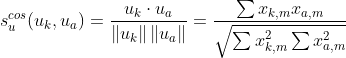

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>

To calculate similarity between items *m* and *b* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>

Your first step will be to create the user-item matrix. Since you have both testing and training data you need to create two matrices.  

In [34]:
train_data_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# First step is to treate two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]
    
# I do not understand how the user-item matrice is built from this loop
# I would like to discuss the output


In [24]:

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

# Does it create the item-item and user-item similarity tables?
# I would like to discuss the output here

In [33]:
user_similarity

array([[0.        , 0.90072373, 0.94802899, ..., 0.88146474, 0.71444285,
        0.92892188],
       [0.90072373, 0.        , 0.95760323, ..., 0.92913176, 0.94731251,
        1.        ],
       [0.94802899, 0.95760323, 0.        , ..., 0.87741979, 0.98603324,
        1.        ],
       ...,
       [0.88146474, 0.92913176, 0.87741979, ..., 0.        , 0.84377558,
        1.        ],
       [0.71444285, 0.94731251, 0.98603324, ..., 0.84377558, 0.        ,
        1.        ],
       [0.92892188, 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

You can use the `pairwise_distances` function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.


**Next step is to make predictions**

 You have already created similarity matrices: user_similarity and item_similarity and therefore you can make a prediction by applying following formula for user-based CF:

.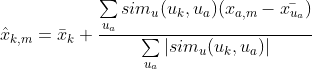

You can look at the similarity between users k and a as weights that are multiplied by the ratings of a similar user a (corrected for the average rating of that user).

You will need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that you are trying to predict.

The idea here is that some users may tend always to give high or low ratings to all movies.  

* The relative difference in the ratings that these users give is more important than the absolute values. 

* To give an example: suppose, user k gives 4 stars to his favourite movies and 3 stars to all other good movies. 

* Suppose now that another user t rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over with 3 stars. 

* These two users could have a very similar taste but treat the rating system differently.

When making a prediction for item-based CF you don't need to correct for users average rating since query user itself is used to do predictions.

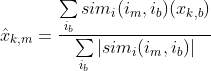

In [25]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    
    return pred

# I do not understand what the code is actually doing here, I would like to discuss this

In [26]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

Next step is to make predictions. You have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\bar{x}_{k}&space;&plus;&space;\frac{\sum\limits_{u_a}&space;sim_u(u_k,&space;u_a)&space;(x_{a,m}&space;-&space;\bar{x_{u_a}})}{\sum\limits_{u_a}|sim_u(u_k,&space;u_a)|}"/>

You can look at the similarity between users *k* and *a* as weights that are multiplied by the ratings of a similar user *a* (corrected for the average rating of that user). You will need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that you are trying to predict. 

The idea here is that some users may tend always to give high or low ratings to all movies. The relative difference in the ratings that these users give is more important than the absolute values. To give an example: suppose, user *k* gives 4 stars to his favourite movies and 3 stars to all other good movies. Suppose now that another user *t* rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over with 3 stars. These two users could have a very similar taste but treat the rating system differently. 

When making a prediction for item-based CF you don't need to correct for users average rating since query user itself is used to do predictions.

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\frac{\sum\limits_{i_b}&space;sim_i(i_m,&space;i_b)&space;(x_{k,b})&space;}{\sum\limits_{i_b}|sim_i(i_m,&space;i_b)|}"/>

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [35]:
item_prediction

array([[3.81302345e-01, 3.94858242e-01, 4.14869656e-01, ...,
        4.68788922e-01, 4.58742373e-01, 4.51989343e-01],
       [7.64117373e-02, 8.98348412e-02, 8.75297608e-02, ...,
        9.02172594e-02, 9.21380752e-02, 9.23465212e-02],
       [7.15554159e-02, 7.57197141e-02, 7.36519764e-02, ...,
        7.12172203e-02, 7.40170454e-02, 7.51960739e-02],
       ...,
       [1.31870883e-01, 1.42393515e-01, 1.49644620e-01, ...,
        1.55843296e-01, 1.54267932e-01, 1.55288326e-01],
       [2.06052053e-01, 1.98850454e-01, 2.24542410e-01, ...,
        2.61094966e-01, 2.51735569e-01, 2.51286139e-01],
       [4.65171222e-04, 5.85545039e-04, 5.75648749e-04, ...,
        6.00218312e-04, 5.78979657e-04, 6.04749506e-04]])

In [ ]:
# Is this RMSE good, or bad?
# Why not using cross validation?
# Is there a way to optimise? 

**Evaluation**
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is Root Mean Squared Error (RMSE).

You can use the mean_square_error (MSE) function from sklearn, where the RMSE is just the square root of MSE. 

Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements in the prediction matrix with prediction\[ground_truth.nonzero()\].

Memory-based algorithms are easy to implement and produce reasonable prediction quality. 

The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. 

Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system. 

In [29]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.1236047341576834
Item-based CF RMSE: 3.4484949312272977


In [32]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens100K is 93.7%


In [ ]:
# Waht does sparsity of 93.7% represents, in plain terms?

To give an example of the learned latent preferences of the users and items:

* let's say for the MovieLens dataset you have the following information: (user id, age, location, gender, movie id, director, actor, language, year, rating). 

* By applying matrix factorization the model learns that important user features are age group (under 10, 10-18, 18-30, 30-90), location and gender, and for movie features it learns that decade, director and actor are most important. 

* Now if you look into the information you have stored, there is no such feature as the decade, but the model can learn on its own. 

* The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. 

* If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features. 

Models that use both ratings and content features are called **Hybrid Recommender Systems** where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction.

## Model-based Collaborative Filtering

Model-based Collaborative Filtering is based on **matrix factorization (MF)** which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. 

Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. 

The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

In [36]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7247411273175683


In [ ]:
# Is this MSE good or bad?
# # Why not using cross validation?
# Is there a way to optimise? 

To give an example of the learned latent preferences of the users and items: 

* let's say for the MovieLens dataset you have the following information: *(user id, age, location, gender, movie id, director, actor, language, year, rating)*. 

* By applying matrix factorization the model learns that important user features are *age group (under 10, 10-18, 18-30, 30-90)*, *location* and *gender*, and for movie features it learns that *decade*, *director* and *actor* are most important. 

* Now if you look into the information you have stored, there is no such feature as the *decade*, but the model can learn on its own.

*  The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features.

Models that use both ratings and content features are called **Hybrid Recommender Systems** where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction.

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.230712,2.375432,0.891315,2.375205,1.313561,0.438484,2.566083,1.744897,1.842289,1.398620,...,-0.011657,-0.040112,0.010024,0.0,0.008049,-0.001315,-0.003944,-0.002630,0.038494,0.063294
1,1.114967,0.036837,-0.086646,0.229728,0.122984,0.269162,0.902723,0.376317,2.081002,0.759860,...,-0.015728,-0.023565,0.002540,0.0,-0.000122,0.004081,0.012244,0.008163,0.000427,-0.012987
2,0.061387,0.032284,0.136390,-0.262878,0.039173,-0.004844,-0.111034,0.155961,0.072452,-0.099547,...,0.004306,-0.008752,0.024600,0.0,0.000857,0.010938,0.032814,0.021876,0.002344,-0.007188
3,0.003655,-0.023310,0.092387,-0.057291,0.208103,-0.023728,0.124681,0.105741,0.214916,-0.130348,...,0.003952,-0.002170,0.014350,0.0,0.006392,0.003682,0.011045,0.007364,0.003162,0.004604
4,2.715665,0.961968,0.412212,1.084314,-0.015904,-0.065819,2.781919,0.622504,-0.477134,0.415339,...,-0.008130,-0.002368,-0.036524,0.0,-0.016653,-0.002157,-0.006472,-0.004314,-0.016252,-0.024559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.388624,-0.115691,-0.286166,1.105597,0.010944,-0.003725,2.041706,0.870204,0.639362,0.434283,...,-0.007296,0.037543,-0.008931,0.0,0.001369,0.004672,0.014017,0.009345,-0.017063,-0.033289
940,1.742362,-0.022806,0.342915,-0.307329,-0.105786,0.004157,1.372226,-0.151767,0.114192,0.109823,...,0.004255,-0.004464,-0.011387,0.0,0.007523,0.000772,0.002316,0.001544,0.000640,0.008973
941,0.767309,0.060450,-0.408717,-0.068995,-0.059803,-0.035725,-0.172226,0.817913,0.526065,0.108650,...,0.012919,0.007275,0.003782,0.0,-0.016946,0.004818,0.014455,0.009637,0.022056,-0.033208
942,1.805026,1.799274,0.703254,1.943325,1.055025,0.128118,1.168231,0.610914,1.865178,-0.460445,...,0.009059,-0.071924,-0.002916,0.0,-0.027094,-0.004629,-0.013888,-0.009259,0.040697,0.006687


### SVD
A well-known matrix factorization method is **Singular value decomposition (SVD)**. Collaborative Filtering can be formulated by approximating a matrix `X` by using singular value decomposition. The winning team at the Netflix Prize competition used SVD matrix factorization models to produce product recommendations, for more information I recommend to read articles: [Netflix Recommendations: Beyond the 5 stars](http://techblog.netflix.com/2012/04/netflix-recommendations-beyond-5-stars.html) and [Netflix Prize and SVD](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf).
The general equation can be expressed as follows:
<img src="https://latex.codecogs.com/gif.latex?X=USV^T" title="X=USV^T" />


Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Elements on the diagnoal in `S` are known as *singular values of `X`*. 


Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space.
Now you can make a prediction by taking dot product of *`U`*, *`S`* and *`V^T`*.

User-based CF MSE: 2.7190320916193045


Carelessly addressing only the relatively few known entries is highly prone to overfitting. SVD can be very slow and computationally expensive. More recent work minimizes the squared error by applying alternating least square or stochastic gradient descent and uses regularization terms to prevent overfitting. Alternating least square and stochastic gradient descent methods for CF will be covered in the next tutorials.


Review:

* We have covered how to implement simple **Collaborative Filtering** methods, both memory-based CF and model-based CF.
* **Memory-based models** are based on similarity between items or users, where we use cosine-similarity.
* **Model-based CF** is based on matrix factorization where we use SVD to factorize the matrix.
* Building recommender systems that perform well in cold-start scenarios (where little data is available on new users and items) remains a challenge. The standard collaborative filtering method performs poorly is such settings. 

In [37]:
pd.DataFrame(X_pred)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,4.496673,2.035891,0.752805,2.888759,0.479727,0.074668,5.239323,2.282538,2.110772,1.993925,...,0.0,0.0,0.0,0.0,-0.010559,-0.002540,0.0,-0.005079,0.001851,0.070730
1,1.789644,-0.169085,0.098499,0.091332,-0.051732,0.318476,0.964822,-0.107402,1.682967,0.468638,...,0.0,0.0,0.0,0.0,-0.010348,0.005619,0.0,0.011238,-0.001739,-0.006203
2,0.390876,-0.124548,0.053430,-0.008893,-0.035858,-0.055784,0.217289,0.057987,0.161226,0.021974,...,0.0,0.0,0.0,0.0,-0.001657,0.011393,0.0,0.022786,0.008460,-0.005682
3,0.155635,-0.204785,-0.042849,-0.062874,0.093889,-0.065116,0.049199,0.156679,0.008000,-0.226435,...,0.0,0.0,0.0,0.0,0.007740,0.008056,0.0,0.016111,0.002382,-0.022907
4,3.677435,1.071366,0.368936,1.341333,0.350329,-0.121066,2.536785,0.976942,-0.041194,0.291972,...,0.0,0.0,0.0,0.0,-0.008602,-0.000361,0.0,-0.000723,-0.004009,-0.002530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.480546,0.116804,-0.304439,1.582907,0.315098,0.021012,0.844893,1.365756,0.761078,-0.005978,...,0.0,0.0,0.0,0.0,0.008475,0.008063,0.0,0.016125,-0.029008,-0.021973
940,1.862176,0.107897,0.198585,-0.091540,-0.077330,-0.018947,1.540795,0.467186,0.327047,0.242982,...,0.0,0.0,0.0,0.0,0.008094,-0.000637,0.0,-0.001273,0.009631,0.001348
941,0.842309,0.023114,-0.051779,0.051685,-0.579096,-0.068013,-0.285596,1.089465,-0.548040,0.016279,...,0.0,0.0,0.0,0.0,0.002202,0.007824,0.0,0.015649,0.004628,-0.014848
942,0.469529,2.090161,1.216311,1.990553,0.778062,0.090818,1.381125,0.233271,1.365151,-0.324135,...,0.0,0.0,0.0,0.0,0.010014,-0.007604,0.0,-0.015207,0.015130,0.036754
